In [ ]:
import pandas as pd
import matplotlib
matplotlib.rcParams["font.family"] = "Arial"
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

Matplotlib created a temporary cache directory at /scratch/naotok/8094989/matplotlib-5u4vr2by because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Gene information

In [2]:
info_df = pd.read_csv("/rhome/naotok/bigdata/genome_annotation/Mouse/Mus_musculus.GRCm38.102.exon.info.tsv", sep = "\t", usecols = ["gene_id", "gene_name", "chr"])
info_df = info_df.drop_duplicates()
info_df.head()

,chr,gene_id,gene_name
0,chr1,ENSMUSG00000102693,4933401J01Rik
1,chr1,ENSMUSG00000064842,Gm26206
2,chr1,ENSMUSG00000051951,Xkr4
9,chr1,ENSMUSG00000102851,Gm18956
10,chr1,ENSMUSG00000103377,Gm37180


# DEG

In [ ]:
# Set path
DEG_path = "/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/Shiba/results/expression/DEG.txt"
Volcano_path = "/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/figure/DEG_volcano.png"
Volcano_DSE_path = "/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/figure/DSE_volcano.png"
Barplot_DSE_path = "/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/figure/DSE_barplot.png"

In [4]:
DEG_df = pd.read_csv(DEG_path, sep = "\t")
DEG_df = DEG_df.rename(columns = {"gene_name": "gene_id"})
DEG_df = pd.merge(DEG_df, info_df, on = "gene_id", how = "left")
DEG_df = DEG_df[~((DEG_df["chr"] == "chrX") | (DEG_df["chr"] == "chrY"))]
DEG_df.head(30)

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr,gene_name
1,ENSMUSG00000034674,3225.362443,-1.676655,0.233547,-7.179085,7.017938e-13,6.685512e-09,chr10,Tdg
3,ENSMUSG00000020014,609.695324,2.313959,0.392328,5.898023,3.678823e-09,2.595041e-05,chr10,Cfap54
4,ENSMUSG00000091028,115.645119,4.398558,0.846973,5.193270,2.066321e-07,1.166066e-03,chr9,Gm10722
5,ENSMUSG00000063320,646.598538,-1.675015,0.327557,-5.113667,3.159638e-07,1.485873e-03,chr10,1190007I07Rik
6,ENSMUSG00000097164,763.324529,-1.817352,0.363957,-4.993316,5.935129e-07,2.392366e-03,chr10,Cep83os
7,ENSMUSG00000031762,2066.466836,-1.252991,0.255181,-4.910205,9.098125e-07,2.852363e-03,chr8,Mt2
8,ENSMUSG00000085666,587.615181,5.257314,1.066352,4.930185,8.215173e-07,2.852363e-03,chr10,Tdg-ps2
9,ENSMUSG00000002266,434.384816,1.715735,0.360216,4.763076,1.906636e-06,5.379763e-03,chr7,Zim1
10,ENSMUSG00000048108,639.427458,2.317344,0.519794,4.458195,8.265260e-06,2.120114e-02,chr6,Tmem72
11,ENSMUSG00000020019,1360.988021,1.280616,0.301813,4.243077,2.204754e-05,4.792860e-02,chr10,Ntn4


In [5]:
# Set criteria of DEG
DEG_log2fc = 1 # Log2(Fold-change) > 1 or < -1
DEG_padj = 0.05 # Adjusted P < 0.05

In [22]:
# Set color for DEG
DEG_df.loc[(DEG_df["log2FoldChange"] > DEG_log2fc) & (DEG_df["padj"] < DEG_padj), "color"] = "#d01c8b" # Up-regulated: #d01c8b
DEG_df.loc[(DEG_df["log2FoldChange"] < -DEG_log2fc) & (DEG_df["padj"] < DEG_padj), "color"] = "#4dac26" # Down-regulated: #4dac26
DEG_df = DEG_df.fillna({"color": "lightgrey"}) # Non-DEG: lightgrey
DEG_df = DEG_df.sort_values("color", ascending = False)

In [23]:
# Add a column of log-transformed adjsuted P-value for y-axis of volcano plot
DEG_df["log_padj"] = -np.log10(DEG_df["padj"])

In [24]:
DEG_df.sort_values("padj").head(30) # Show first five rows of DEG_df

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr,gene_name,color,log_padj
1,ENSMUSG00000034674,3225.362443,-1.676655,0.233547,-7.179085,7.017938e-13,6.685512e-09,chr10,Tdg,#4dac26,8.174865
3,ENSMUSG00000020014,609.695324,2.313959,0.392328,5.898023,3.678823e-09,2.595041e-05,chr10,Cfap54,#d01c8b,4.585856
4,ENSMUSG00000091028,115.645119,4.398558,0.846973,5.193270,2.066321e-07,1.166066e-03,chr9,Gm10722,#d01c8b,2.933277
5,ENSMUSG00000063320,646.598538,-1.675015,0.327557,-5.113667,3.159638e-07,1.485873e-03,chr10,1190007I07Rik,#4dac26,2.828018
6,ENSMUSG00000097164,763.324529,-1.817352,0.363957,-4.993316,5.935129e-07,2.392366e-03,chr10,Cep83os,#4dac26,2.621172
7,ENSMUSG00000031762,2066.466836,-1.252991,0.255181,-4.910205,9.098125e-07,2.852363e-03,chr8,Mt2,#4dac26,2.544795
8,ENSMUSG00000085666,587.615181,5.257314,1.066352,4.930185,8.215173e-07,2.852363e-03,chr10,Tdg-ps2,#d01c8b,2.544795
9,ENSMUSG00000002266,434.384816,1.715735,0.360216,4.763076,1.906636e-06,5.379763e-03,chr7,Zim1,#d01c8b,2.269237
10,ENSMUSG00000048108,639.427458,2.317344,0.519794,4.458195,8.265260e-06,2.120114e-02,chr6,Tmem72,#d01c8b,1.673641
11,ENSMUSG00000020019,1360.988021,1.280616,0.301813,4.243077,2.204754e-05,4.792860e-02,chr10,Ntn4,#d01c8b,1.319405


## Volcano

In [25]:
# Specify genes to label
label_genes = DEG_df[DEG_df["color"] != "lightgrey"]["gene_name"].tolist()

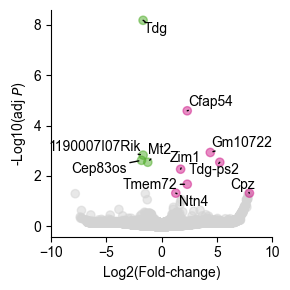

In [39]:
# Volcano plot
fig = plt.figure(figsize = (3, 3)) # Set figure size
ax = fig.add_subplot(111)
ax = plt.scatter(
    data = DEG_df,
    x = "log2FoldChange",
    y = "log_padj",
    color = DEG_df["color"],
    alpha = 0.5
)
plt.xlabel("Log2(Fold-change)") # Set the label of x-axis
plt.ylabel("-Log10(adj $\it{P}$)") # Set the label of y-axis
plt.xlim(-10, 10) # Set limits of x-axis
# Add labels
texts = [
    plt.text(
        DEG_df[DEG_df["gene_name"] == label_genes[k]]["log2FoldChange"].tolist()[0],
        DEG_df[DEG_df["gene_name"] == label_genes[k]]["log_padj"].tolist()[0],
        label_genes[k],
        ha = 'center', va = 'center'
    ) 
    for k in range(len(label_genes))
]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))
sns.despine() # Remove the top and right spines
plt.tight_layout()
plt.savefig(Volcano_path, dpi = 1000) # Save figure

In [27]:
DEG_df.groupby("color").size()

color
#4dac26          4
#d01c8b          7
lightgrey    27409
dtype: int64

# DSG

In [ ]:
events_Shiba = ["SE", "FIVE", "THREE", "MXE", "RI", "MSE", "AFE", "ALE"]
Shiba_df = pd.DataFrame()
Shiba_DSG_df = pd.DataFrame()
for event in events_Shiba:
    tmp_df = pd.read_csv("/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/Shiba/results/splicing/PSI_" + event + ".txt", sep = "\t")
    tmp_df = tmp_df[["pos_id", "gene_id", "Diff events", "dPSI", "q", "p_ttest"]]
    Shiba_df = tmp_df if Shiba_df.empty else pd.concat([Shiba_df, tmp_df])
    tmp_df = tmp_df[(tmp_df["Diff events"] == "Yes") & (tmp_df["p_ttest"] < 0.05)][["gene_id"]]
    Shiba_DSG_df = tmp_df if Shiba_DSG_df.empty else pd.concat([Shiba_DSG_df, tmp_df])
Shiba_df = Shiba_df.dropna()
Shiba_df["dPSI"] = Shiba_df["dPSI"]*100
Shiba_df["log_q"] = -np.log10(Shiba_df["q"])
Shiba_df["event_type"] = Shiba_df["pos_id"].map(lambda x: x.split("@")[0])
Shiba_DSG_df = Shiba_DSG_df.drop_duplicates()

In [34]:
Shiba_df.loc[(Shiba_df["Diff events"] == "Yes") & (Shiba_df["p_ttest"] < 0.05) & (Shiba_df["dPSI"] > 10), "color"] = "#d01c8b"
Shiba_df.loc[(Shiba_df["Diff events"] == "Yes") & (Shiba_df["p_ttest"] < 0.05) & (Shiba_df["dPSI"] < -10), "color"] = "#4dac26"
Shiba_df = Shiba_df.fillna({"color": "lightgrey"})
Shiba_df = Shiba_df.sort_values("color", ascending = False)
Shiba_df

,pos_id,gene_id,Diff events,dPSI,q,p_ttest,log_q,event_type,color
1859,AFE@chr15@102486040-102487088@102486217-102487088,ENSMUSG00000056851,No,1.738653,4.917777e-11,0.468268,10.308231,AFE,lightgrey
594,SE@chr18@65644193-65644369@65625334-65682895,ENSMUSG00000042439,Yes,27.147537,5.251038e-05,0.876918,4.279755,SE,lightgrey
599,SE@chr7@41643333-41643432@41634710-41647483,ENSMUSG00000074165,Yes,-36.065574,5.856121e-05,0.422650,4.232390,SE,lightgrey
600,SE@chr9@60680505-60680702@60680171-60685035,ENSMUSG00000047766,Yes,-13.273493,5.912942e-05,0.248032,4.228196,SE,lightgrey
601,SE@chr9@80087430-80087523@80067572-80089849,ENSMUSG00000034252,Yes,-16.722408,5.937988e-05,0.287971,4.226361,SE,lightgrey
...,...,...,...,...,...,...,...,...,...
8,MXE@chr10@80410274@80410398-80410621@80412827-...,ENSMUSG00000020167,Yes,-17.930683,4.322311e-02,0.030789,1.364284,MXE,#4dac26
7,MXE@chr2@92349448@92351609-92351631@92351701-9...,ENSMUSG00000058318,Yes,-16.107122,7.528566e-03,0.045030,2.123288,MXE,#4dac26
233,MSE@chr7@112333829-112335156;112335329-1123354...,ENSMUSG00000038244,Yes,-23.154362,4.056023e-02,0.009630,1.391900,MSE,#4dac26
412,THREE@chr4@106699912-106700127@106699908-10670...,ENSMUSG00000047502,Yes,-25.682468,5.776360e-07,0.013482,6.238346,THREE,#4dac26


In [35]:
Shiba_df.groupby("color").size()

color
#4dac26        241
#d01c8b        340
lightgrey    38002
dtype: int64

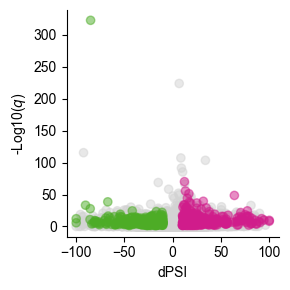

In [40]:
# Volcano plot
fig = plt.figure(figsize = (3, 3)) # Set figure size
ax = fig.add_subplot(111)
ax = plt.scatter(
    data = Shiba_df,
    x = "dPSI",
    y = "log_q",
    color = Shiba_df["color"],
    alpha = 0.5
)
plt.xlabel("dPSI") # Set the label of x-axis
plt.ylabel("-Log10($\it{q}$)") # Set the label of y-axis
plt.xlim(-110, 110) # Set limits of x-axis
sns.despine() # Remove the top and right spines
plt.tight_layout()
plt.savefig(Volcano_DSE_path, dpi = 1000) # Save figure

In [37]:
Shiba_DSE_count_df = Shiba_df.groupby(["event_type", "color"], as_index = False).size()
Shiba_DSE_count_df["group"] = Shiba_DSE_count_df["color"].map({"#d01c8b": "Up", "#4dac26": "Down"})
Shiba_DSE_count_df = Shiba_DSE_count_df.dropna()
Shiba_DSE_count_df

,event_type,color,size,group
0,AFE,#4dac26,53,Down
1,AFE,#d01c8b,39,Up
3,ALE,#4dac26,12,Down
4,ALE,#d01c8b,10,Up
6,FIVE,#4dac26,32,Down
7,FIVE,#d01c8b,44,Up
9,MSE,#4dac26,13,Down
10,MSE,#d01c8b,14,Up
12,MXE,#4dac26,2,Down
13,MXE,#d01c8b,2,Up


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


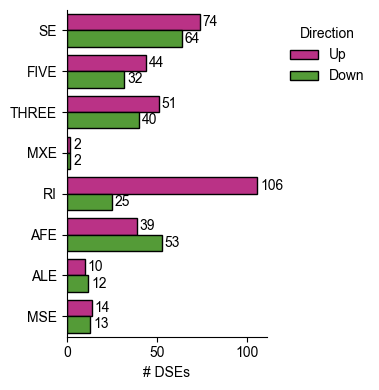

In [38]:
g = sns.catplot(
    data = Shiba_DSE_count_df,
    x = "size",
    y = "event_type",
    order = ["SE", "FIVE", "THREE", "MXE", "RI", "AFE", "ALE", "MSE"],
    hue = "group",
    hue_order = ["Up", "Down"],
    palette = ["#d01c8b", "#4dac26"],
    kind = "bar",
    linewidth = 1,
    edgecolor = "black",
    height = 4, aspect = 0.8,
)
g.set_axis_labels("# DSEs", "")
sns.move_legend(g, "upper right", bbox_to_anchor=(1.05, 0.95), title = "Direction")
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]
# iterate through the axes containers
for c in ax.containers:
#     labels = [(v.get_height()) for v in c]
    ax.bar_label(c, label_type='edge', padding = 2)
    
plt.savefig(Barplot_DSE_path, dpi = 1000, bbox_inches = "tight") # Save figure

## Metascape

In [ ]:
Shiba_DSG_df.to_csv("/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/Shiba/results/splicing/DSG.tsv", sep = "\t", index = False, header = False)

In [19]:
def metascape(metascape_path: str, output_path: str):
    # import metascape results
    metascape_df = pd.read_csv(
        metascape_path
    )
    # Summary GO
    metascape_summary_df = metascape_df[
        metascape_df['GroupID'].str.contains("Summary")
    ]
    # -Log
    metascape_summary_df['minus LogP'] = -metascape_summary_df['LogP']
    metascape_summary_df['minus LogQ'] = -metascape_summary_df['Log(q-value)']
    metascape_summary_df = metascape_summary_df.sort_values("minus LogP")
    # number of genes
    metascape_summary_df["n_genes"] = metascape_summary_df['InTerm_InList'].str.split("/", expand = True)[0].astype(int)
    # top 10
    metascape_summary_df = metascape_summary_df.tail(10)
    # scatter plot
    fig = plt.figure(figsize = (4, 2))
    ax = fig.add_subplot(111)
    ax = plt.scatter(
        data = metascape_summary_df,
        y = "Description",
        x = "minus LogP",
        c = metascape_summary_df['n_genes'],
        cmap = "BuPu",
        edgecolor = "black",
        s = 80
    )
    cbar = plt.colorbar()
    cbar.set_label("# Genes")
    plt.xlabel("-Log$_{10}$($\it{P}$)")
    plt.ylabel("")
    sns.despine()
#     plt.tight_layout()
    plt.savefig(output_path, bbox_inches = "tight", dpi = 1000)

/scratch/naotok/8094989/ipykernel_4043919/1366941975.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metascape_summary_df['minus LogP'] = -metascape_summary_df['LogP']
/scratch/naotok/8094989/ipykernel_4043919/1366941975.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metascape_summary_df['minus LogQ'] = -metascape_summary_df['Log(q-value)']


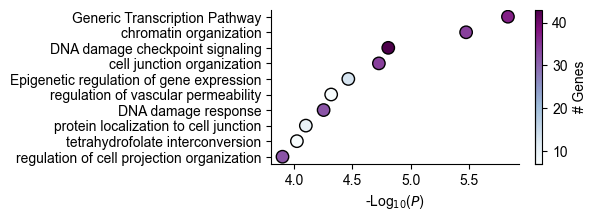

In [ ]:
metascape(
    "/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/Shiba/results/splicing/metascape_result.csv",
    "/rhome/naotok/bigdata/Ptbp1_astrocyte/Jul24/figure/DSG_metascape.png"
)